# Nelson-Siegel-Svensson Model

Before running the Notebook, install these libraries:
<br> `pip install pandas`
<br> `pip install openpyxl`

Also, make sure the excel file "Bond Data.xlsx" is in the same directory as this Notebook.

## Preparing Data

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import datetime as dt
from IPython.display import display

### Import Bond data

In [2]:
#Make sure that the file is in the same directory as this Notebook
bond_data = pd.read_excel("Bond Data.xlsx")
bond_data

,Bond,Type,Maturity,T,FV,Price,Frequency,c,Coupon n.,YTM
0,1m,ZCB,2019-02-13,0.0361,100,100.018,1,0.0000,0,-0.00498
1,3m,ZCB,2019-04-10,0.1944,100,100.105,1,0.0000,0,-0.00540
2,6m,ZCB,2019-06-19,0.3861,100,100.221,1,0.0000,0,-0.00572
3,1y,Fixed,2019-12-13,0.8694,100,100.473,1,0.0000,0,-0.00543
4,2y,Fixed,2020-12-11,1.8639,100,101.069,1,0.0000,0,-0.00570
5,3y,Fixed,2022-10-07,3.6861,100,101.706,1,0.0000,0,-0.00459
6,5y,Fixed,2024-04-05,5.1806,100,101.534,1,0.0000,0,-0.00294
7,6y,Fixed,2025-02-15,6.0417,100,104.437,1,0.0050,7,-0.00152
8,8y,Fixed,2027-02-15,8.0417,100,102.285,1,0.0025,9,-0.00004
9,10y,Fixed,2029-02-15,10.0417,100,100.627,1,0.0025,11,0.00211


### Define Series for Convenience

In [3]:
maturities = bond_data["T"]
yields = bond_data["YTM"]
coupon_rates = bond_data["c"]
frequencies = bond_data["Frequency"]
prices = bond_data["Price"]

## Build the model

In [4]:
# Redefine the Model for Scipy, coeficientes defaulted to 1
def NSS(maturity, beta1=0, beta2=0, beta3=0, beta4=0, lambda1=0, lambda2=0):
    nss_ytm = (
        beta1
        + beta2 * ((1 - np.exp(-maturity / lambda1)) / (maturity / lambda1))
        + beta3
        * (
            (1 - np.exp(-maturity / lambda1)) / (maturity / lambda1)
            - np.exp(-maturity / lambda1)
        )
        + beta4
        * (
            (1 - np.exp(-maturity / lambda2)) / (maturity / lambda2)
            - np.exp(-maturity / lambda2)
        )
    )
    return nss_ytm

optimal_parameters, _ = curve_fit(NSS, maturities, yields,bounds=(-1,2))

# Visualize the Predictions
ytm_prediction=NSS(maturities, *optimal_parameters)
ytm_prediction.name="NSS Prediction"
df = pd.concat([bond_data, ytm_prediction], axis=1)
df["Squared Errors"] = (df["YTM"] - df["NSS Prediction"]) ** 2

display(df)

c:\Users\ngorh\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Bond,Type,Maturity,T,FV,Price,Frequency,c,Coupon n.,YTM,NSS Prediction,Squared Errors
0,1m,ZCB,2019-02-13,0.0361,100,100.018,1,0.0000,0,-0.00498,-0.004979,1.443424e-12
1,3m,ZCB,2019-04-10,0.1944,100,100.105,1,0.0000,0,-0.00540,-0.005444,1.900740e-09
2,6m,ZCB,2019-06-19,0.3861,100,100.221,1,0.0000,0,-0.00572,-0.005616,1.078987e-08
3,1y,Fixed,2019-12-13,0.8694,100,100.473,1,0.0000,0,-0.00543,-0.005564,1.803603e-08
4,2y,Fixed,2020-12-11,1.8639,100,101.069,1,0.0000,0,-0.00570,-0.005563,1.885711e-08
5,3y,Fixed,2022-10-07,3.6861,100,101.706,1,0.0000,0,-0.00459,-0.004616,6.834104e-10
6,5y,Fixed,2024-04-05,5.1806,100,101.534,1,0.0000,0,-0.00294,-0.002927,1.711241e-10
7,6y,Fixed,2025-02-15,6.0417,100,104.437,1,0.0050,7,-0.00152,-0.001873,1.248257e-07
8,8y,Fixed,2027-02-15,8.0417,100,102.285,1,0.0025,9,-0.00004,0.000377,1.741309e-07
9,10y,Fixed,2029-02-15,10.0417,100,100.627,1,0.0025,11,0.00211,0.002176,4.399232e-09


## Price Calculation

In [5]:

df_price_calculation=pd.concat([bond_data.loc[:,['T','c','Frequency']],df['NSS Prediction']],axis=1)
def cont_yield_price(maturity, coupon, frequency, r):
    prc = 0
    for i in range(1,int(round(float(maturity), 0))+1): 
        prc += (coupon/frequency) * np.sum(np.exp(-r*i))
    prc += np.exp(-r*maturity)
    prc *= 100
    return prc

df_price_calculation.values
for row in df_price_calculation.iterrows():
    price=cont_yield_price(*row[1])
    df_price_calculation.loc[row[0],'Price NSS']=price


## Final Presentation

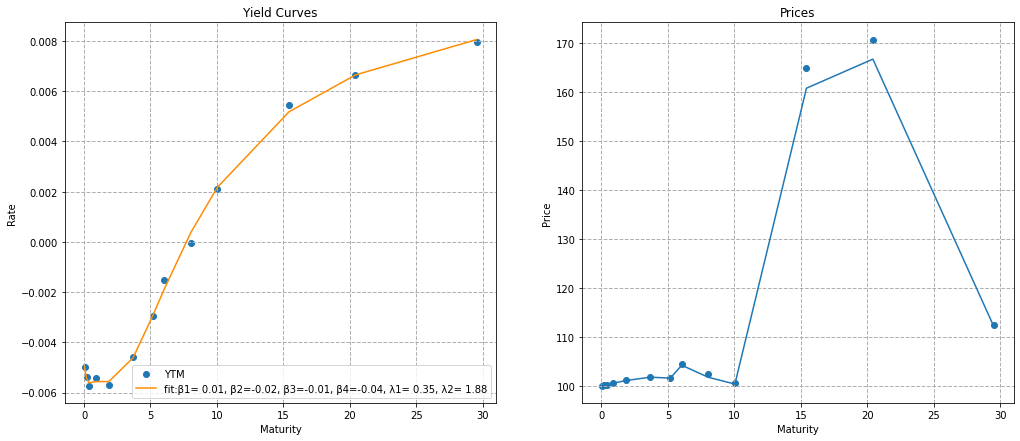

,Bond,Type,Maturity,T,FV,Price,Frequency,c,Coupon n.,YTM,NSS Prediction,Price NSS
0,1m,ZCB,2019-02-13,0.0361,100,100.018,1,0.0000,0,-0.00498,-0.004979,100.017975
1,3m,ZCB,2019-04-10,0.1944,100,100.105,1,0.0000,0,-0.00540,-0.005444,100.105880
2,6m,ZCB,2019-06-19,0.3861,100,100.221,1,0.0000,0,-0.00572,-0.005616,100.217074
3,1y,Fixed,2019-12-13,0.8694,100,100.473,1,0.0000,0,-0.00543,-0.005564,100.484932
4,2y,Fixed,2020-12-11,1.8639,100,101.069,1,0.0000,0,-0.00570,-0.005563,101.042221
5,3y,Fixed,2022-10-07,3.6861,100,101.706,1,0.0000,0,-0.00459,-0.004616,101.716115
6,5y,Fixed,2024-04-05,5.1806,100,101.534,1,0.0000,0,-0.00294,-0.002927,101.527874
7,6y,Fixed,2025-02-15,6.0417,100,104.437,1,0.0050,7,-0.00152,-0.001873,104.157975
8,8y,Fixed,2027-02-15,8.0417,100,102.285,1,0.0025,9,-0.00004,0.000377,101.693663
9,10y,Fixed,2029-02-15,10.0417,100,100.627,1,0.0025,11,0.00211,0.002176,100.308607


β1     1.121188e-02
β2    -1.601383e-02
β3    -1.152441e-02
β4    -4.442656e-02
λ1     3.495054e-01
λ2     1.883308e+00
SSE    4.362956e-07
Name: NSS Params, dtype: float64

In [6]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(17, 7)

# Plot the Yield Curve
plt.subplot(1,2,1)
plt.title("Yield Curves")
plt.xlabel("Maturity")
plt.ylabel("Rate")
plt.grid(linestyle="--", linewidth=1)
plt.scatter(maturities, yields, label="YTM")
plt.plot(
    maturities,
    NSS(maturities, *optimal_parameters),
    label="fit:β1=%5.2f, β2=%5.2f, β3=%5.2f, β4=%5.2f, λ1=%5.2f, λ2=%5.2f"
    % tuple(optimal_parameters),
    c="darkorange",
)
plt.legend()

# Plot the Bond Prices
plt.subplot(1,2,2)
plt.title("Prices")
plt.xlabel("Maturity")
plt.ylabel("Price")
plt.grid(linestyle="--", linewidth=1)
plt.scatter(maturities, prices, label="YTM")
plt.plot(maturities,df_price_calculation['Price NSS'])

plt.show()

# Display the D
display(pd.concat([bond_data,df_price_calculation.loc[:,["NSS Prediction", "Price NSS"]]],axis=1))

# Display the Regression Parameters
regression_params=pd.Series(optimal_parameters, index=['β1','β2','β3','β4','λ1','λ2'],name="NSS Params")
regression_params['SSE']=df['Squared Errors'].sum()
display(regression_params)